<a href="https://colab.research.google.com/github/bacoco/deeplearning.fr/blob/main/eda_and_automl_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT your DATA to classify

In [1]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(return_X_y=False)

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
target='target'
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

##### library to import

In [2]:
import sys
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[target], test_size=0.25)

# EDA - Exploratory Data Analysis


## SWEETVIZ

> https://github.com/fbdesignpro/sweetviz

> https://youtu.be/UR_OK8vBpeY




In [ ]:
!pip install sweetviz

In [5]:
import sweetviz as sv

my_report = sv.analyze(df)

# we generate html report
# Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report.show_html() 

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



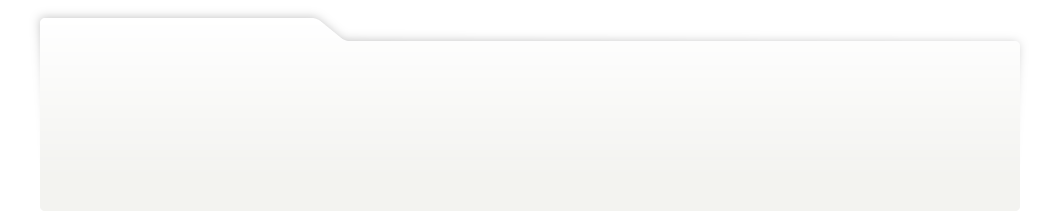
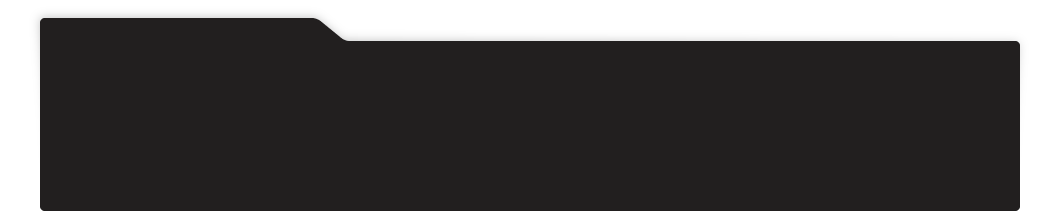
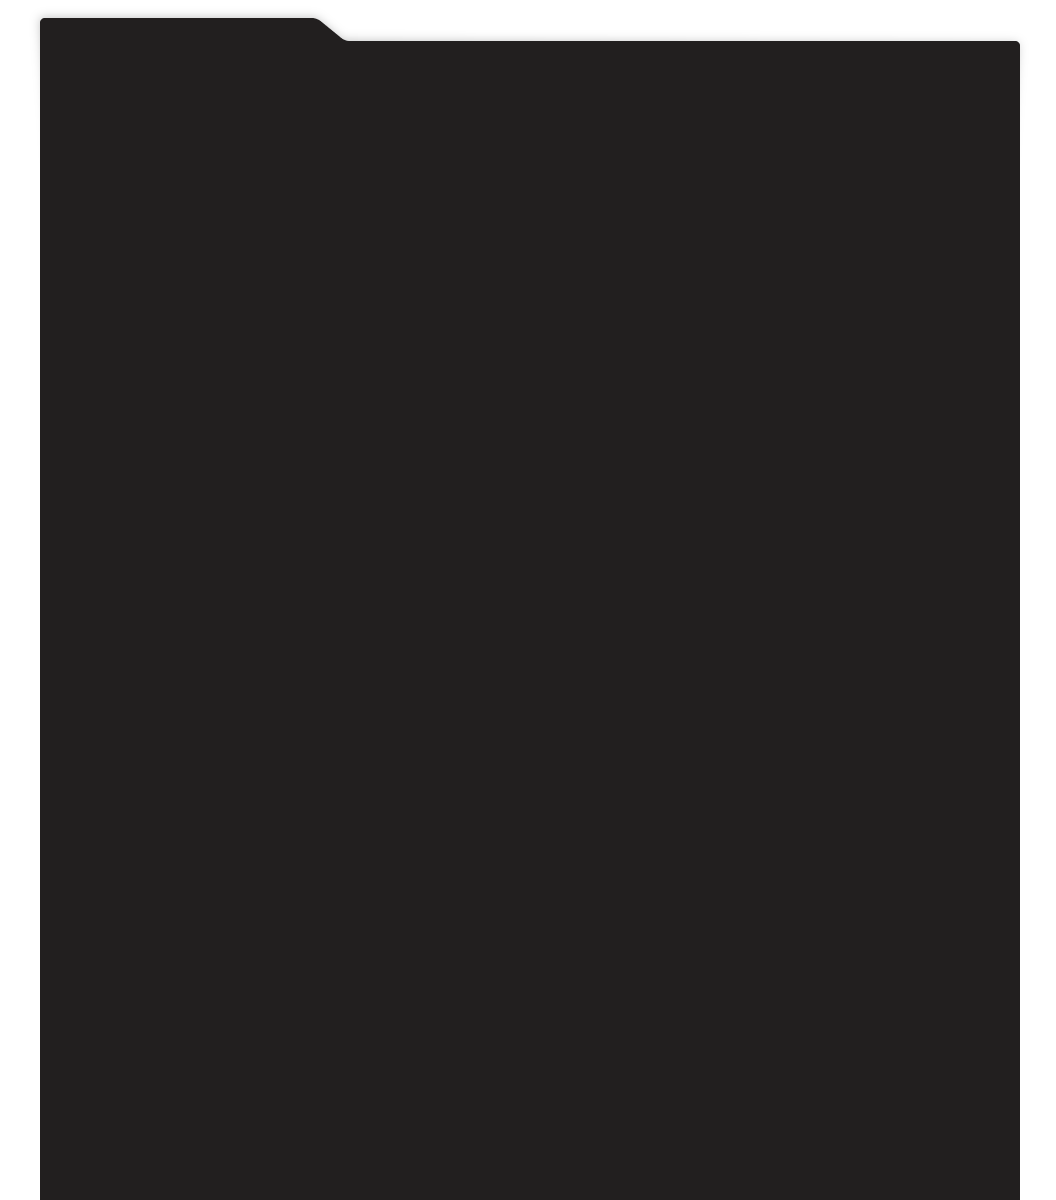
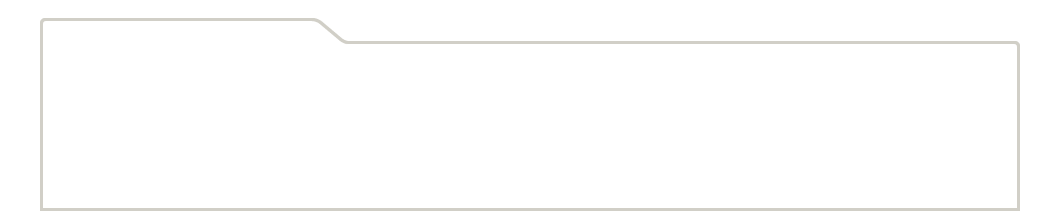
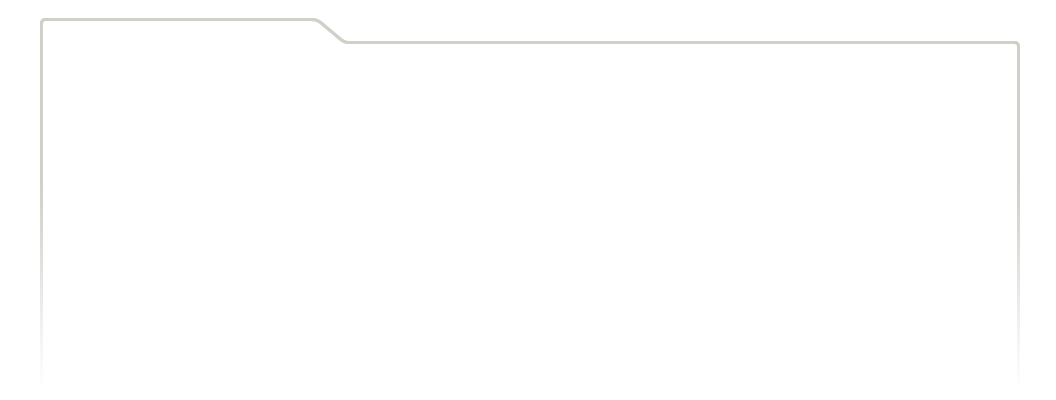
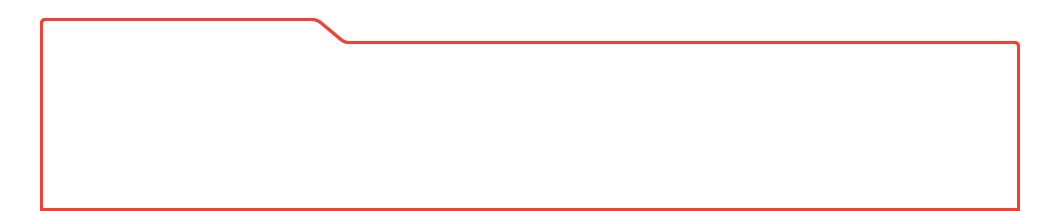
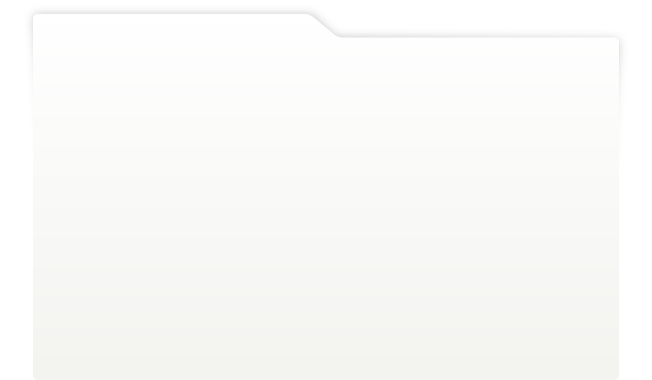
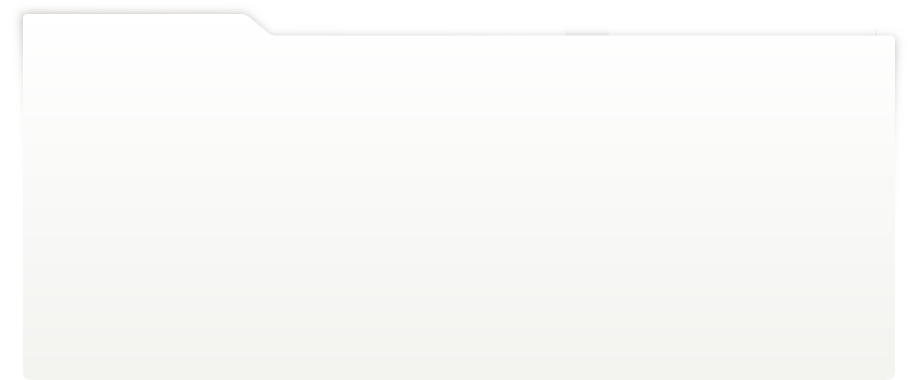
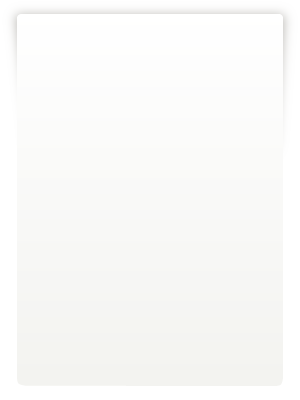
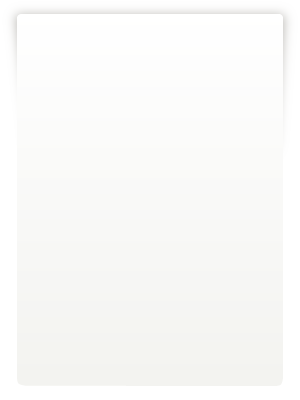
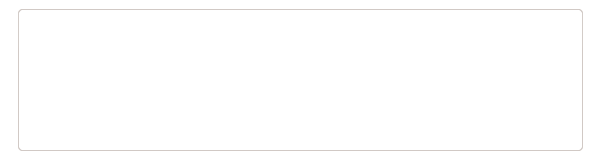
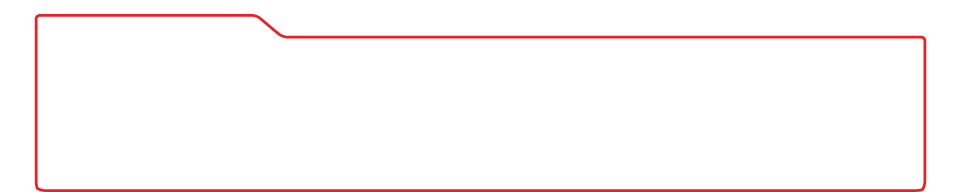
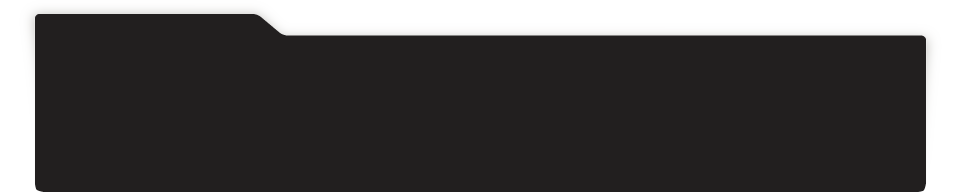
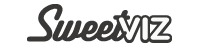
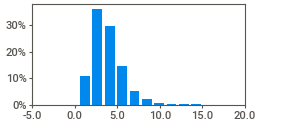
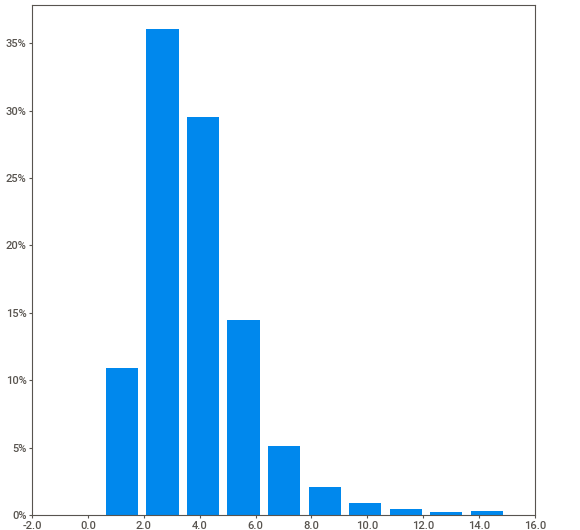
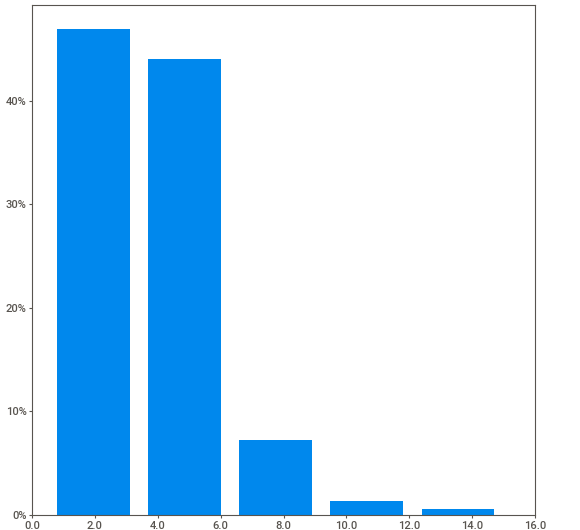
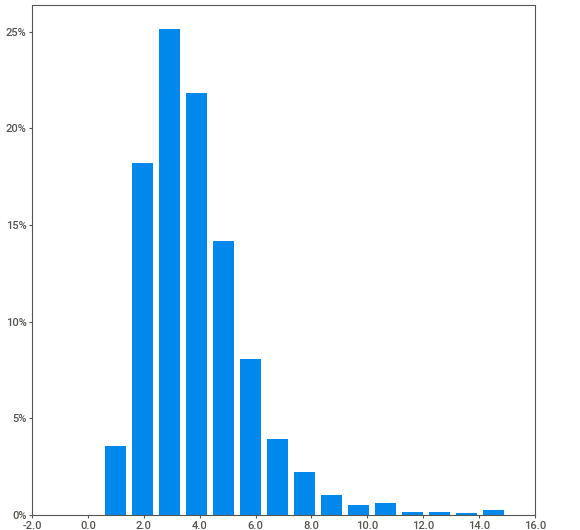
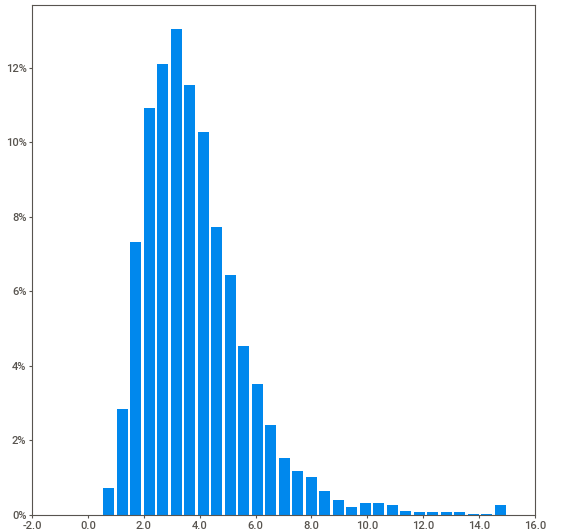
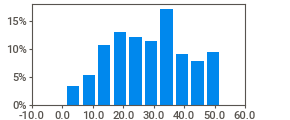
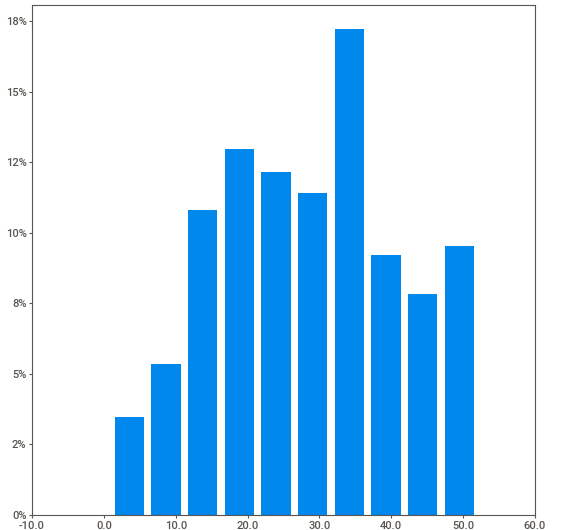
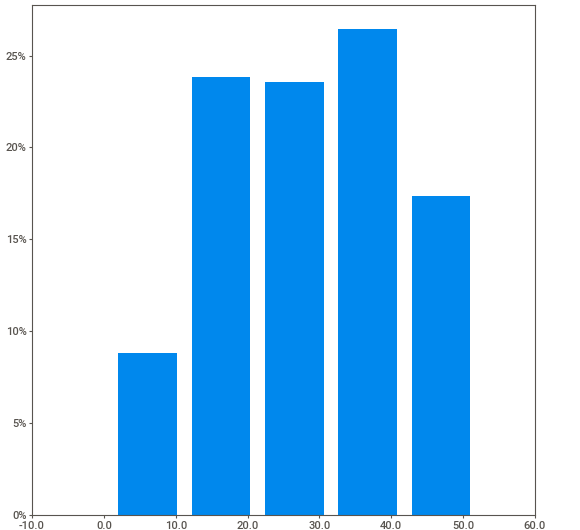
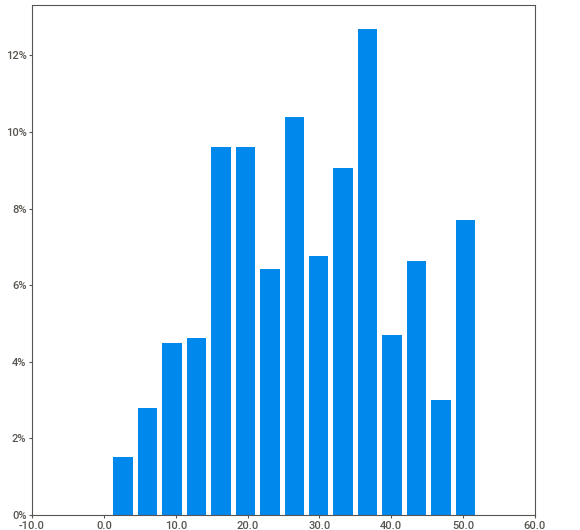
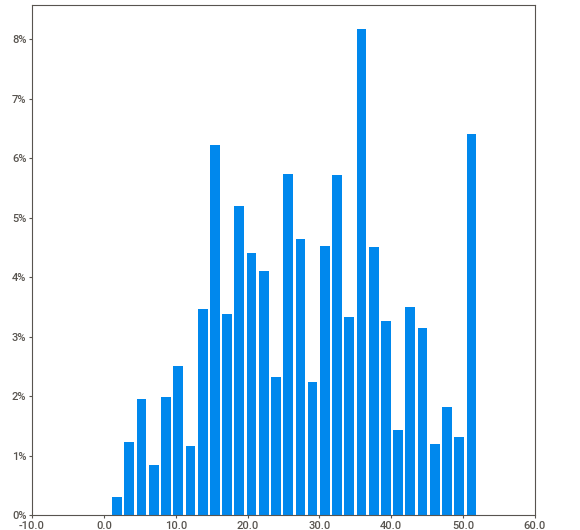
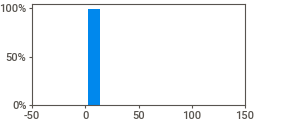
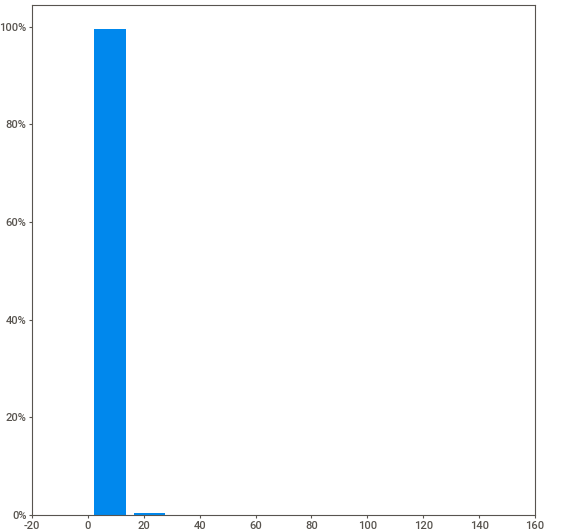
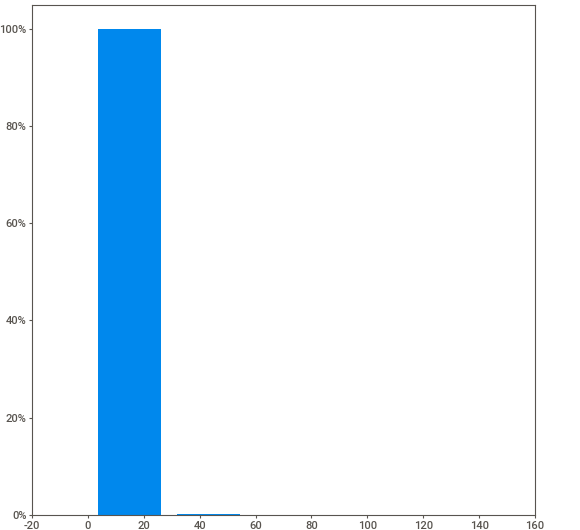
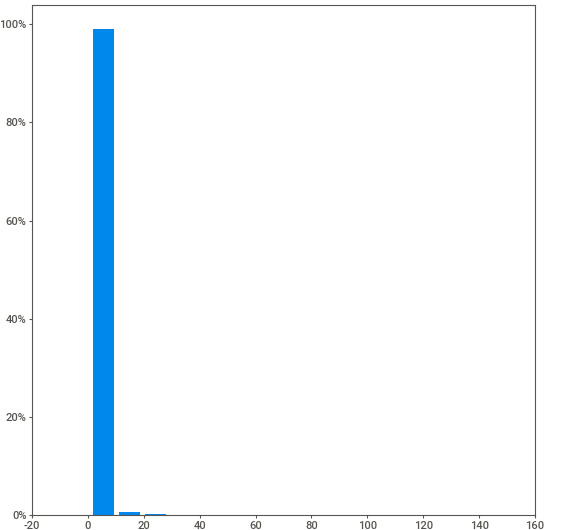
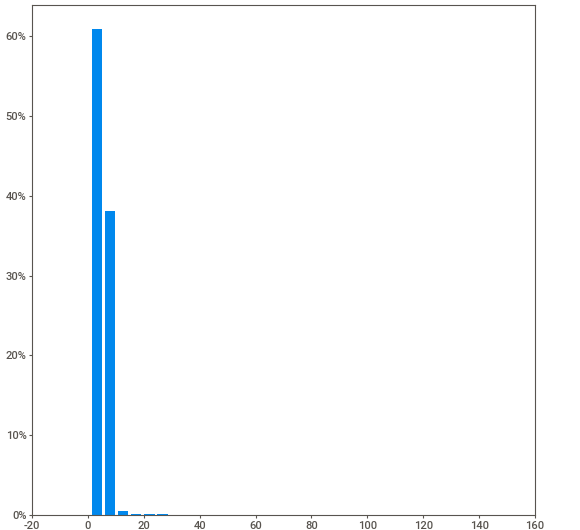
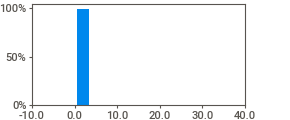
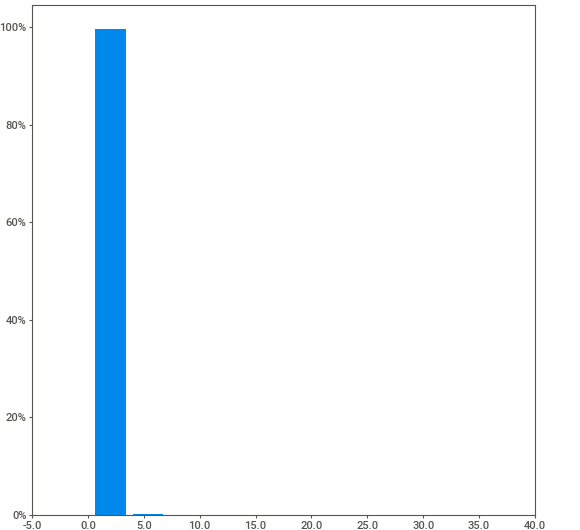
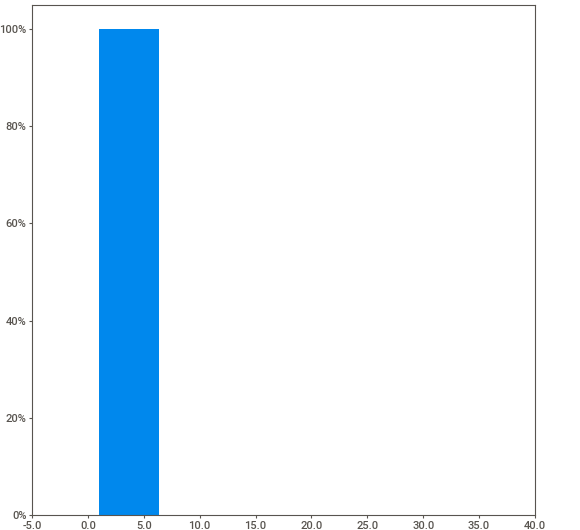
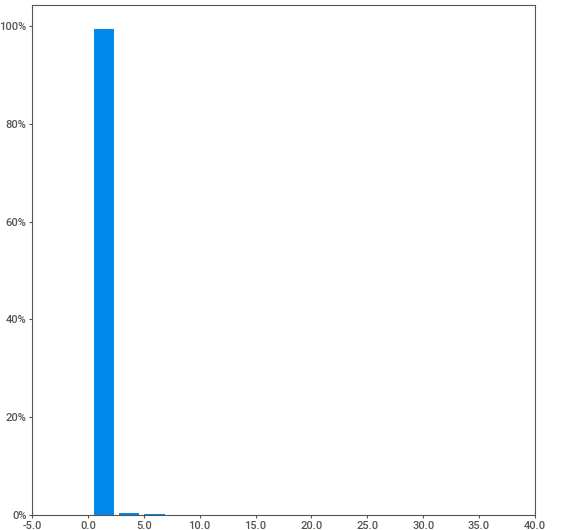
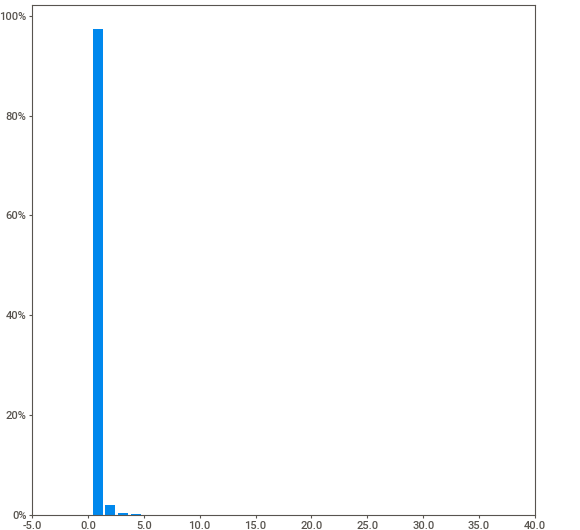
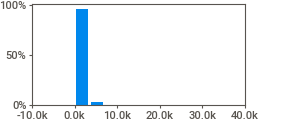
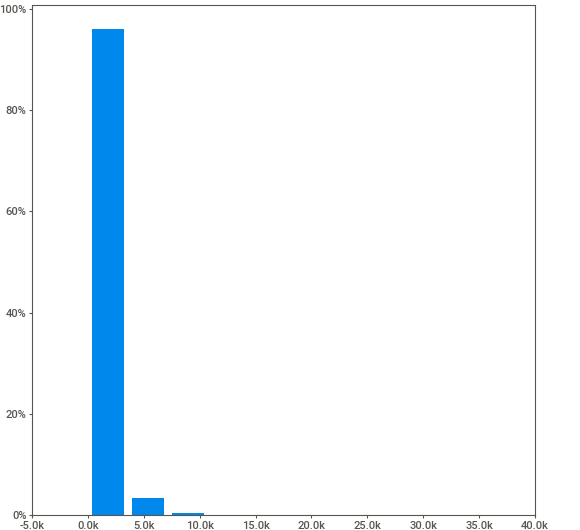
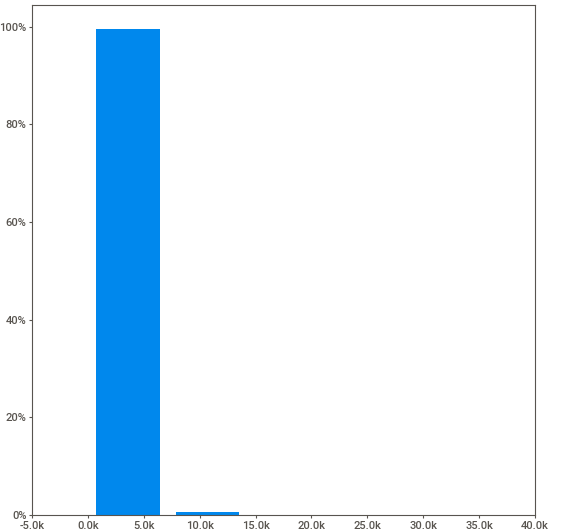
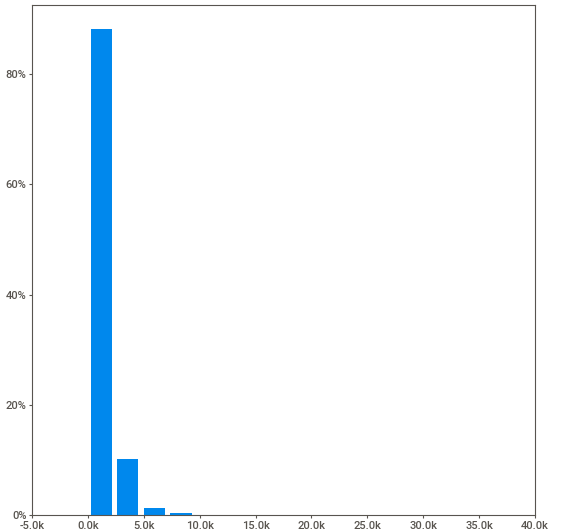
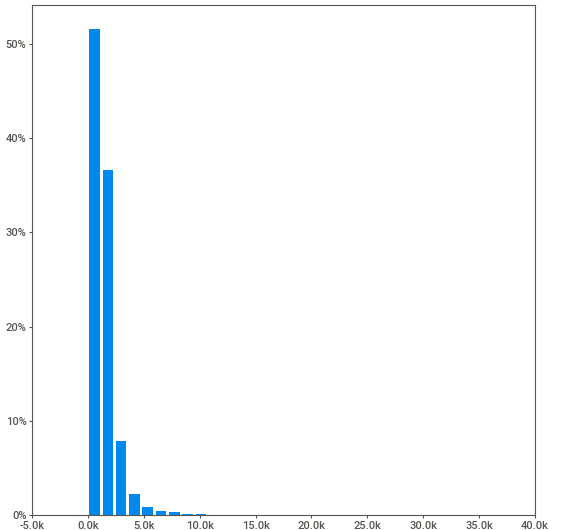
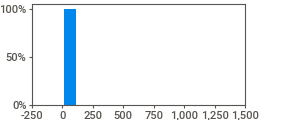
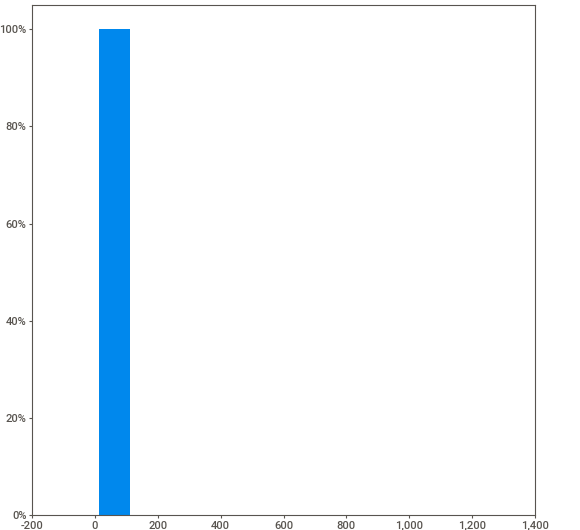
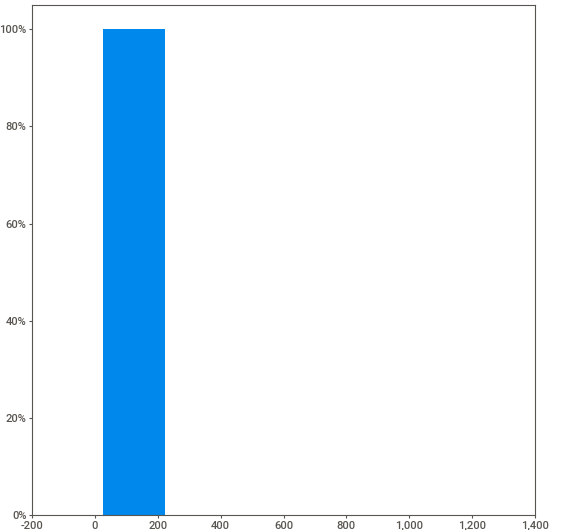
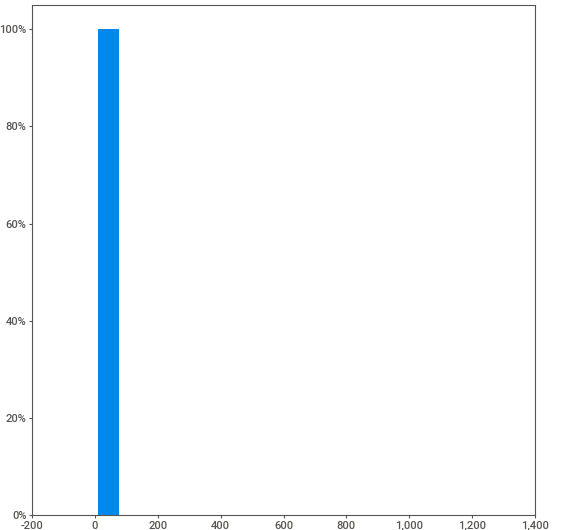
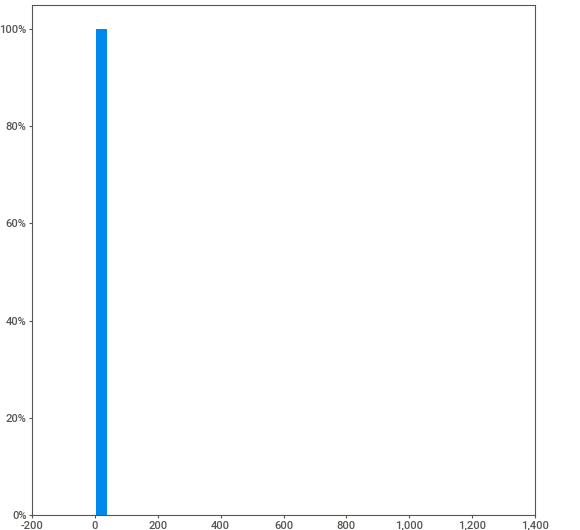
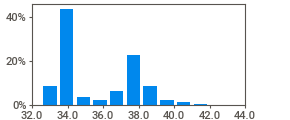
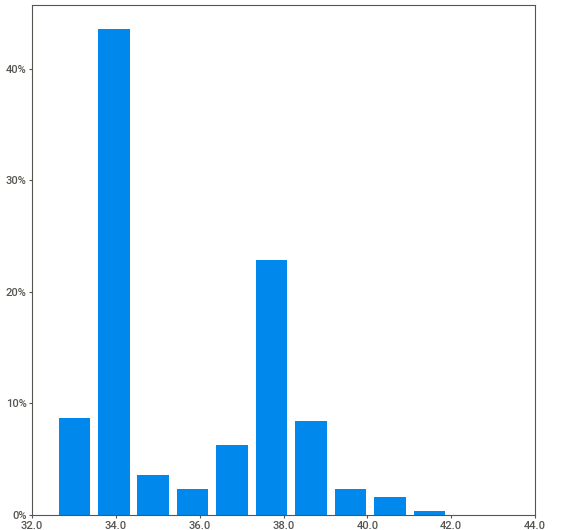
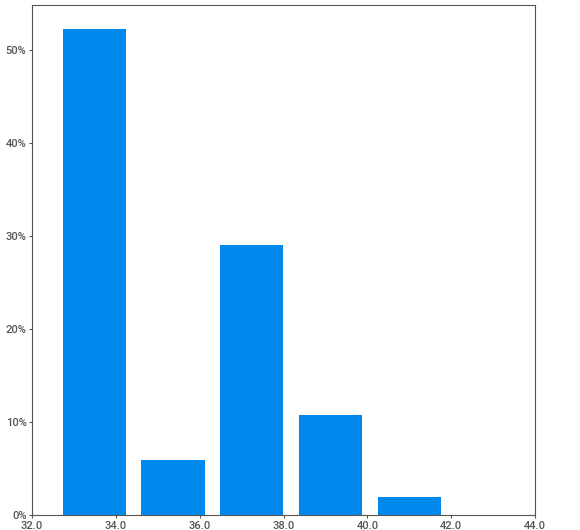
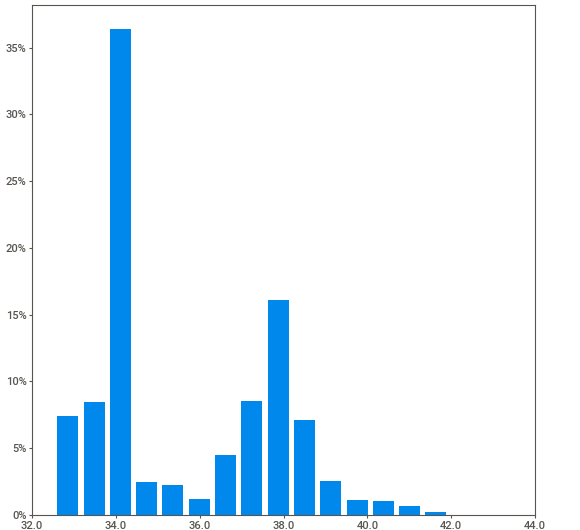
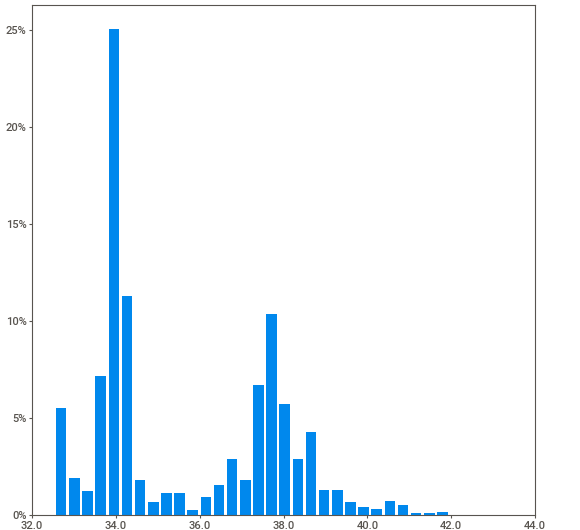
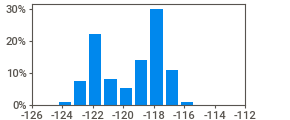
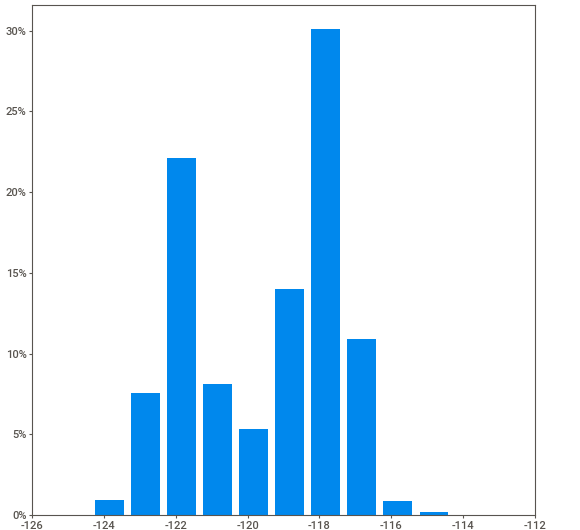
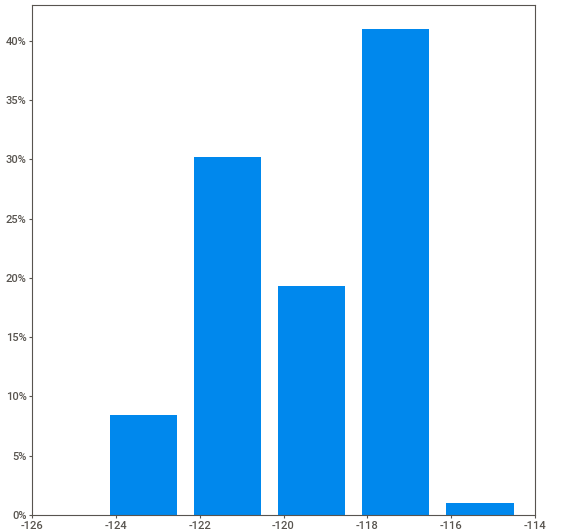
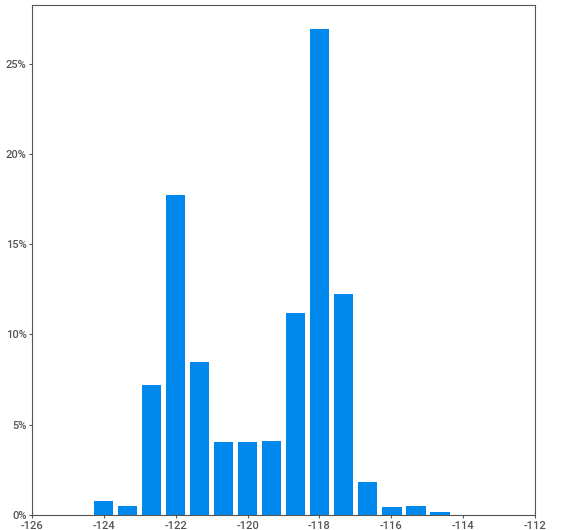
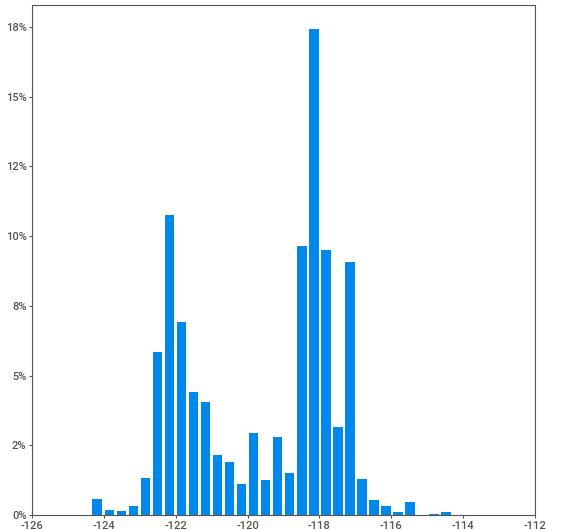
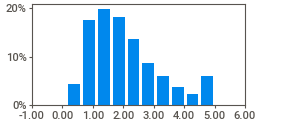
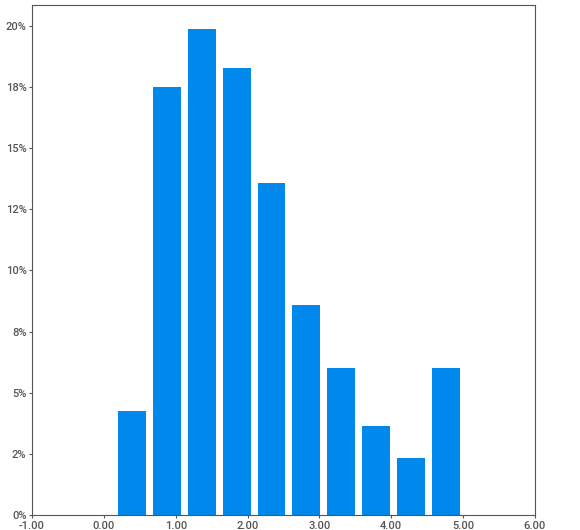
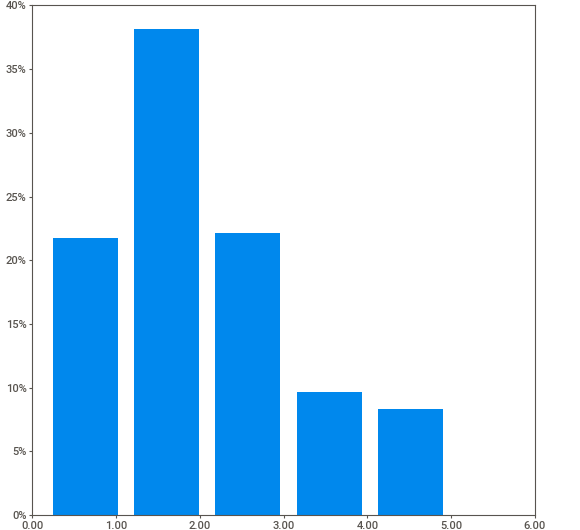
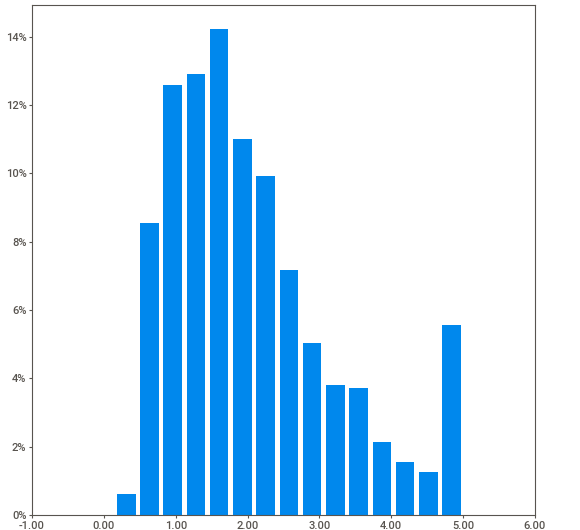
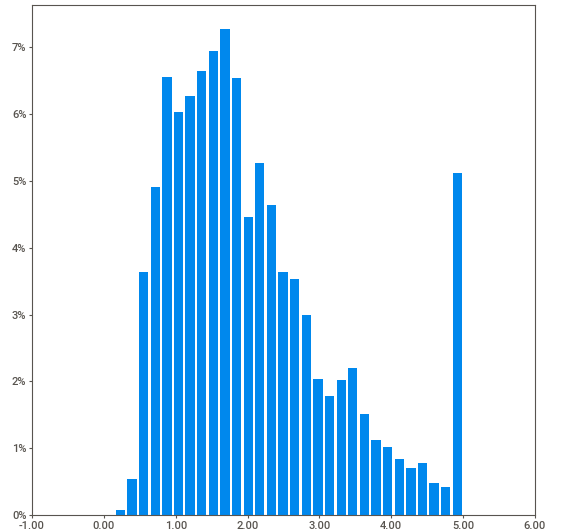
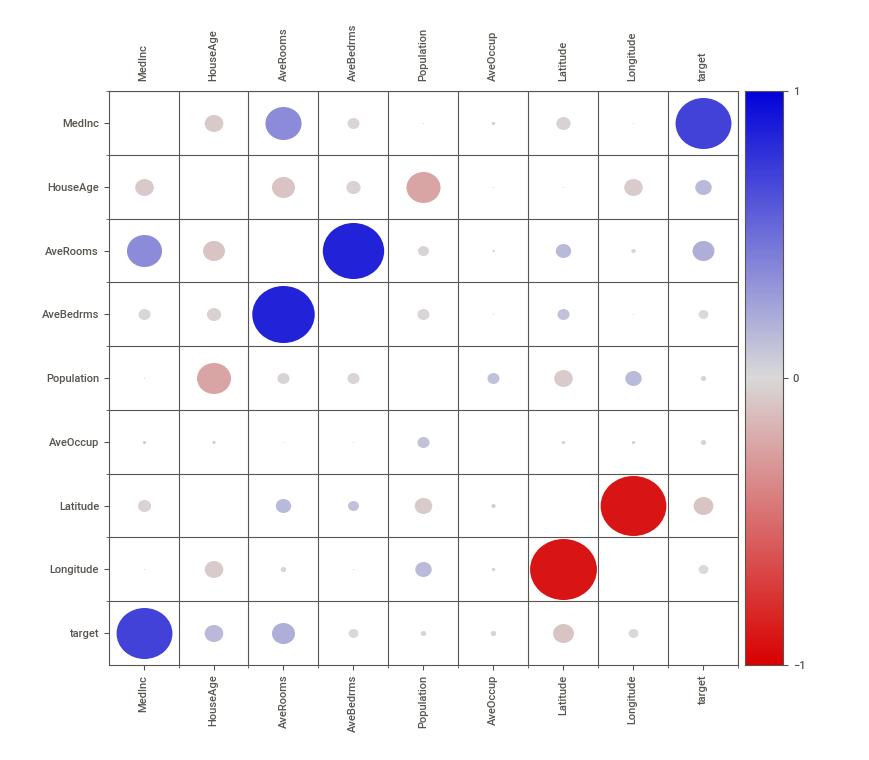
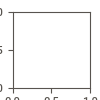

In [6]:
# we generate inline report
my_report.show_notebook()

## YDATA  PROFILING
https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata_profiling
#!pip install matplotlib==3.1.3

In [8]:
from ydata_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="Profiling Report")

In [10]:
#To generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
profile.to_file("ydata_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#The HTML report can be directly embedded in a cell in a similar fashion:
profile.to_notebook_iframe()

# AUTOML

## MLJAR
### https://github.com/mljar/mljar-supervised

In [ ]:
!pip install mljar-supervised[full]

In [ ]:
from supervised.automl import AutoML
automl = AutoML(mode="Perform",results_path="AutoML_regression")
#automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_regression
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM rmse 0.455915 trained in 90.21 seconds (1-sample predict time 0.2202 seconds)
2_Default_Xgboost rmse 0.458553 trained in 35.52 seconds (1-sample predict time 0.0517 seconds)
3_Default_CatBoost rmse 0.45089 trained in 37.59 seconds (1-sample predict time 0.0584 seconds)
4_Default_NeuralNetwork rmse 0.552234 trained in 17.14 seconds (1-sample predict time 0.0826 seconds)
5_Default_RandomForest rmse 0.713927 traine

In [27]:
y_predicted = automl.predict(X_test)
y_predicted

array([1.55837093, 1.32824344, 2.38488293, ..., 0.69831085, 1.2100356 ,
       2.51543094])

In [28]:
pd.read_csv('/content/AutoML_regression/leaderboard.csv')

name      model_type metric_type  \
0                  1_Default_LightGBM        LightGBM        rmse   
1                   2_Default_Xgboost         Xgboost        rmse   
2                  3_Default_CatBoost        CatBoost        rmse   
3             4_Default_NeuralNetwork  Neural Network        rmse   
4              5_Default_RandomForest   Random Forest        rmse   
5                         10_LightGBM        LightGBM        rmse   
6                           6_Xgboost         Xgboost        rmse   
7                         14_CatBoost        CatBoost        rmse   
8                     18_RandomForest   Random Forest        rmse   
9                    22_NeuralNetwork  Neural Network        rmse   
10                        11_LightGBM        LightGBM        rmse   
11                          7_Xgboost         Xgboost        rmse   
12                        15_CatBoost        CatBoost        rmse   
13                    19_RandomForest   Random Forest        rmse   
14                   23_NeuralNetwork  Neural Network        rmse   
15                        12_LightGBM        LightGBM        rmse   
16                          8_Xgboost         Xgboost        rmse   
17                        16_CatBoost        CatBoost        rmse   
18                    20_RandomForest   Random Forest        rmse   
19                   24_NeuralNetwork  Neural Network        rmse   
20                        13_LightGBM        LightGBM        rmse   
21                          9_Xgboost         Xgboost        rmse   
22                        17_CatBoost        CatBoost        rmse   
23                    21_RandomForest   Random Forest        rmse   
24                   25_NeuralNetwork  Neural Network        rmse   
25         14_CatBoost_GoldenFeatures        CatBoost        rmse   
26         16_CatBoost_GoldenFeatures        CatBoost        rmse   
27  3_Default_CatBoost_GoldenFeatures        CatBoost        rmse   
28         26_CatBoost_GoldenFeatures        CatBoost        rmse   
29         27_CatBoost_GoldenFeatures        CatBoost        rmse   
30                        28_CatBoost        CatBoost        rmse   
31                        29_CatBoost        CatBoost        rmse   
32                        30_LightGBM        LightGBM        rmse   
33                        31_LightGBM        LightGBM        rmse   
34                         32_Xgboost         Xgboost        rmse   
35                         33_Xgboost         Xgboost        rmse   
36                         34_Xgboost         Xgboost        rmse   
37                         35_Xgboost         Xgboost        rmse   
38                   36_NeuralNetwork  Neural Network        rmse   
39                   37_NeuralNetwork  Neural Network        rmse   
40                   38_NeuralNetwork  Neural Network        rmse   
41                    39_RandomForest   Random Forest        rmse   
42                    40_RandomForest   Random Forest        rmse   
43                    41_RandomForest   Random Forest        rmse   
44                    42_RandomForest   Random Forest        rmse   
45                        43_CatBoost        CatBoost        rmse   
46                        44_CatBoost        CatBoost        rmse   
47         45_CatBoost_GoldenFeatures        CatBoost        rmse   
48                        47_LightGBM        LightGBM        rmse   
49                        48_LightGBM        LightGBM        rmse   
50                        49_LightGBM        LightGBM        rmse   
51                           Ensemble        Ensemble        rmse   

    metric_value  train_time  single_prediction_time  
0       0.455915       91.38                  0.2202  
1       0.458553       36.94                  0.0517  
2       0.450890       38.67                  0.0584  
3       0.552234       18.09                  0.0826  
4       0.713927       28.03                  0.1258  
5       0.457666       93.67                 

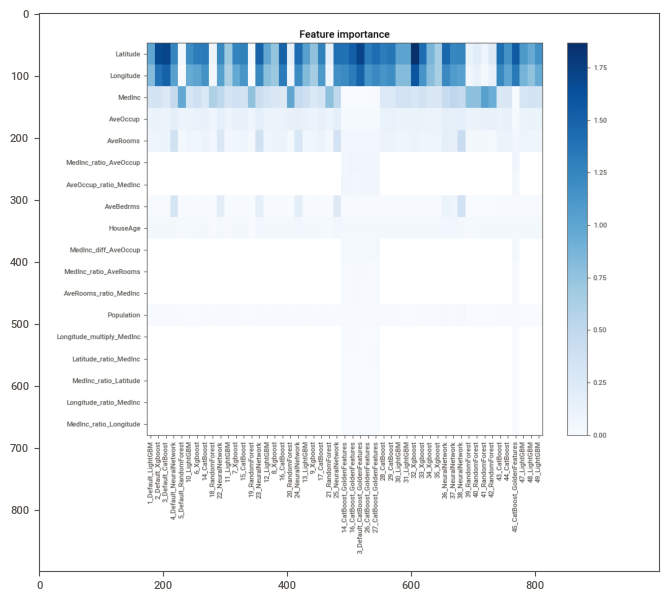

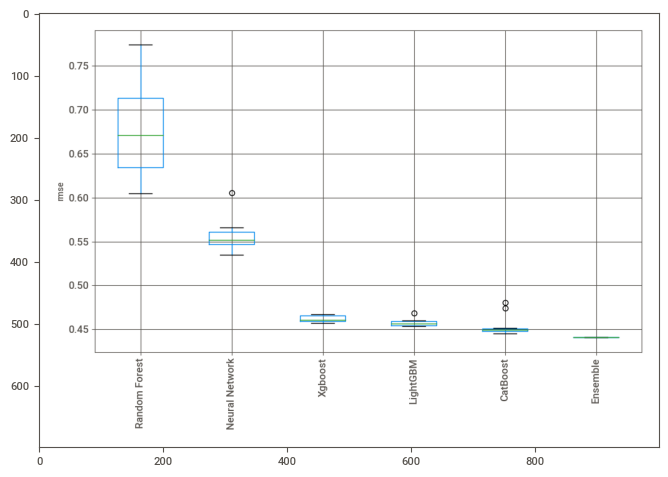

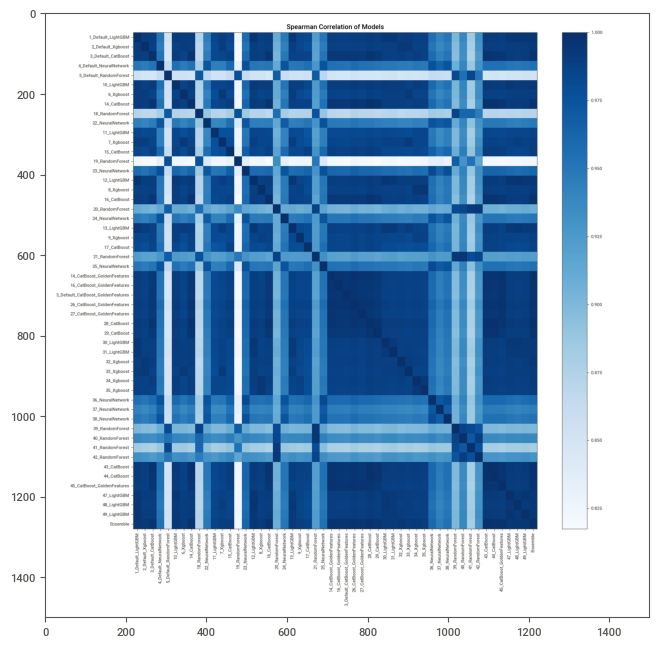

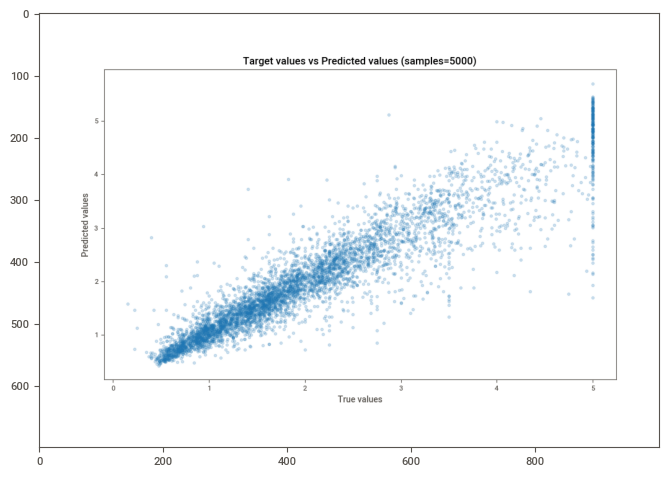

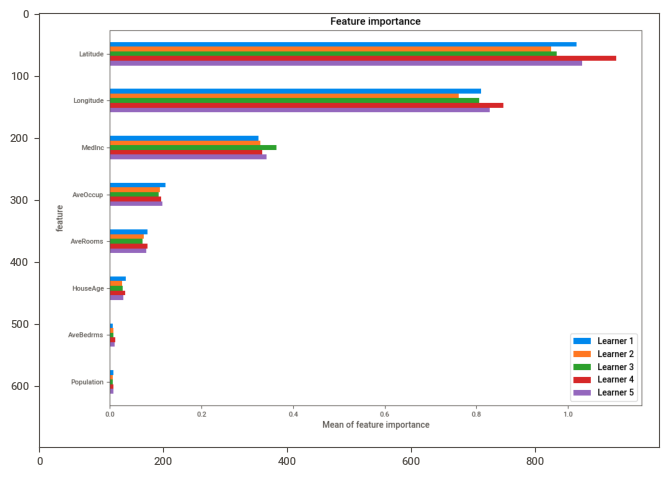

In [29]:
import imageio

def show_image(file):
  im=imageio.imread(file)
  plt.figure(figsize=(8,8))
  plt.imshow(im)
  plt.show()

show_image('/content/AutoML_regression/features_heatmap.png')
show_image('/content/AutoML_regression/ldb_performance_boxplot.png')
show_image('/content/AutoML_regression/correlation_heatmap.png')
show_image('/content/AutoML_regression/Ensemble/true_vs_predicted.png')
show_image('/content/AutoML_regression/30_LightGBM/permutation_importance.png')


# TPOT

In [30]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from tpot import TPOTRegressor

In [ ]:
tpot = TPOTRegressor(generations=2, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2340805023505137


In [ ]:
print(tpot.score(X_test, y_test))
tpot.export('TPOTRegressor_pipeline.py')

# PYCARET
### https://pycaret.gitbook.io/docs/

## LAZYPREDICT
https://lazypredict.readthedocs.io/en/latest/